In [2]:
import osmnx as ox
#Playing around with osmnx in this cell
%matplotlib inline
G = ox.graph_from_place('Sheffield, UK')
fig, ax = ox.plot_graph(ox.project_graph(G))

SSLError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?format=json&limit=1&dedupe=0&polygon_geojson=1&q=Sheffield%2C+UK (Caused by SSLError(SSLError("bad handshake: SysCallError(10054, 'WSAECONNRESET')")))

In [3]:
import geopandas
import pandas as pd
#sheff_OShighways = geopandas.read_file(r"C:\Users\cip18jjp\Dropbox\PIN\1 Data\1 Data\Workshop_2_data\Sheffield_OA.shp")
#sheff = geopandas.read_file(r"C:\Users\cip18jjp\Dropbox\PIN\1 Data\1 Data\Workshop_2_data\Sheffield_Network.gdb")
sheff_lsoa = geopandas.read_file(r"C:\Users\cip18jjp\Dropbox\PIN\1 Data\1 Data\CDRC\Census Data Pack\Sheffield\shapefiles\Sheffield_lsoa11.shp")
sheff_lsoa_income = geopandas.read_file(r"C:\Users\cip18jjp\Dropbox\PIN\1 Data\1 Data\CDRC\Individual LSOA Income Estimate\E37000040\spatial\E37000040.shp")

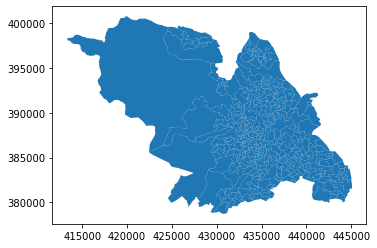

In [4]:
sheff_lsoa.plot()
#sheff_lsoa_income

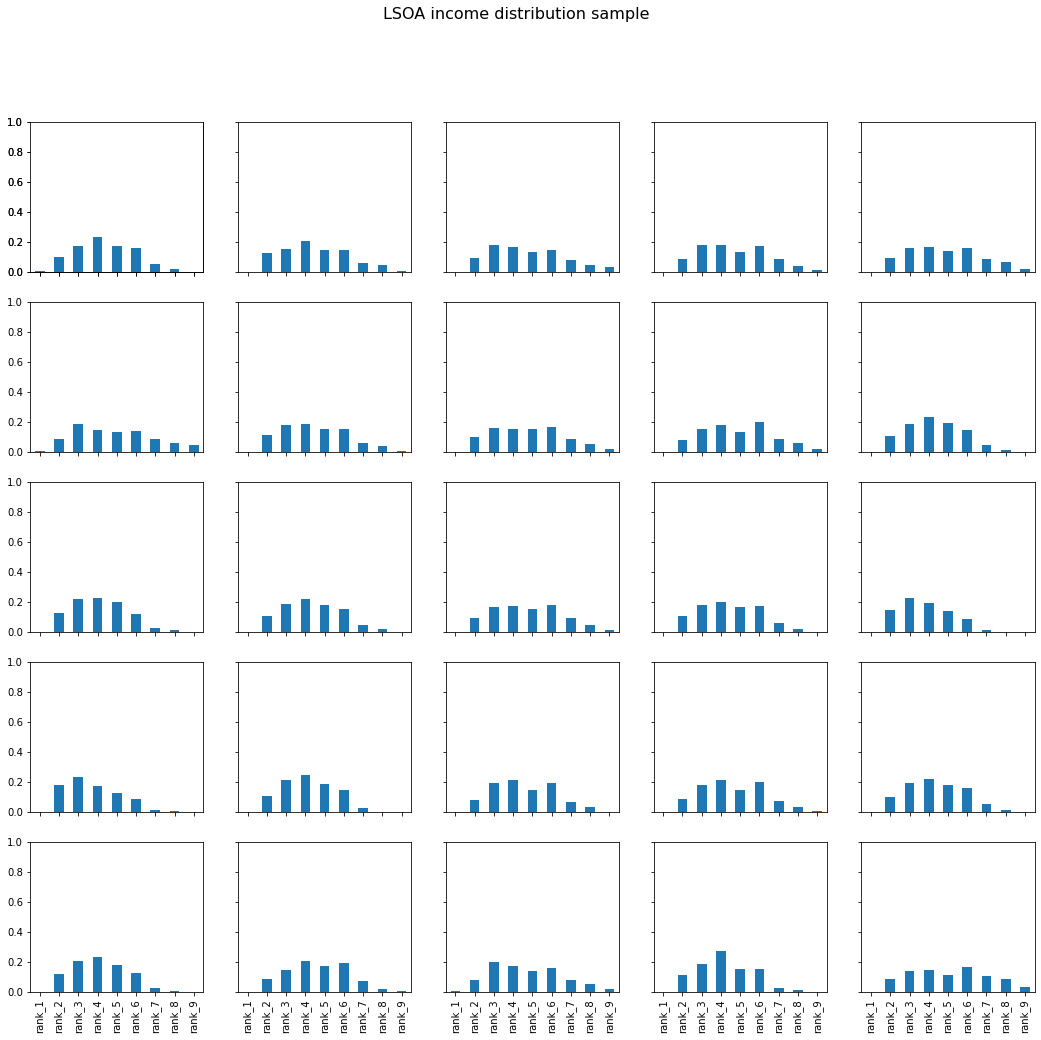

In [6]:
#Income Distributions
import matplotlib.pyplot as plt
import numpy as np
vals = sheff_lsoa_income.iloc[5]['rank_1':'rank_9']


#Indexing 25 evenly spaced from array
idx = np.round(np.linspace(0, len(sheff_lsoa_income) - 1, 25)).astype(int)


fig = plt.figure(figsize=(18,16))
fig.suptitle('LSOA income distribution sample', fontsize=16)
ax0 = fig.add_subplot(5,5,1)
for i in range(len(idx)):
    ax = fig.add_subplot(5,5,i+1, sharex = ax0, sharey = ax0)
    ax = sheff_lsoa_income.iloc[idx[i]]['rank_1':'rank_9'].plot.bar()
    ax.set_ylim(0,1)


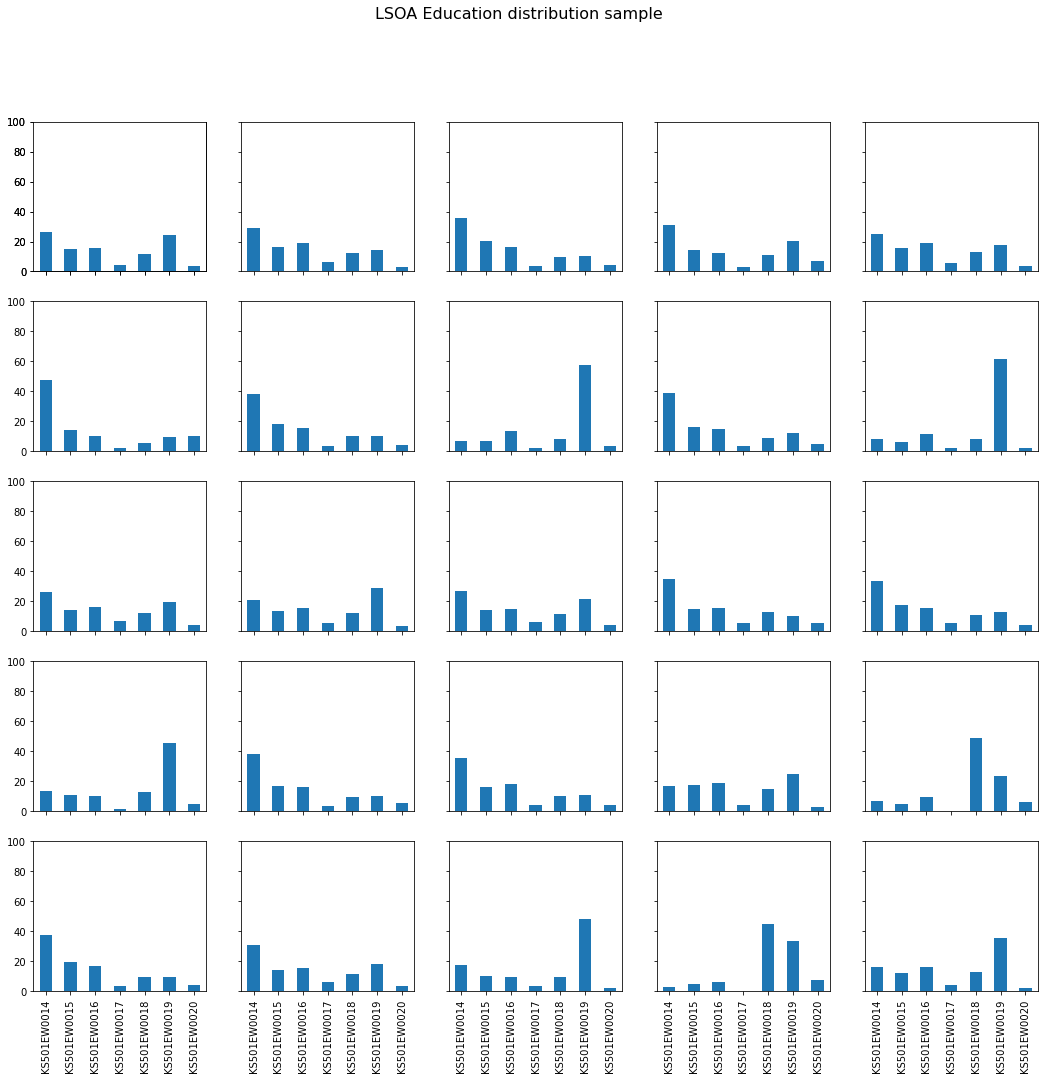

In [8]:
#Education - find in the atlas and then import table as CSV
sheff_lsoa_education = geopandas.read_file(r"C:\Users\cip18jjp\Dropbox\PIN\1 Data\1 Data\CDRC\Census Data Pack\Sheffield\tables\KS501EW_lsoa11.csv")


#Creating variables for education labels
#no_qual = ['KS501EW0014']
#lev1 = ['KS501EW0015']
#lev2 = ['KS501EW0016']
#apprenticeship = ['KS501EW0017']
#lev3 = ['KS501EW0018']
#lev4 = ['KS501EW0019']
#other = ['KS501EW0020']

#Indexing 25 evenly spaced from array
idx = np.round(np.linspace(0, len(sheff_lsoa_education) - 1, 25)).astype(int)

fig = plt.figure(figsize=(18,16))
fig.suptitle('LSOA Education distribution sample', fontsize=16)

ax0 = fig.add_subplot(5,5,1)
for i in range(len(idx)):
    ax = fig.add_subplot(5,5,i+1, sharex = ax0, sharey = ax0)
    vals = sheff_lsoa_education.iloc[idx[i]]['KS501EW0014':'KS501EW0020']
    vals = pd.to_numeric(vals)
    ax.set_ylim(0,100)
    ax = vals.plot.bar()
    
